# Project Code

In [11]:
#import libraries
import numpy as np
import pandas as pd
import re
from textblob import TextBlob as tb ##TextBlob object will allow for quick sentiment analysis
from emo_unicode import EMO_UNICODE #A set of dictionaries of emoticons : their text represenstations
from emo_unicode import UNICODE_EMO ## courtesy of NeelShah18 on GitHub
                                  

In [12]:
#read tweet information into dataframe
tweets = pd.read_csv('tweets.csv')

In [13]:
#replace emojis with their text representation
##this method is courtesy of kaggle.com user SRK

UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

In [14]:
#create series objects of the polarity and subjectivity of the tweets
polarity = tweets.text.map(lambda x: tb(x).sentiment.polarity)
subjectivity = tweets.text.map(lambda x: tb(x).sentiment.subjectivity)

In [15]:
#add new columns to tweets df corresponding to the new info
tweets['polarity'] = polarity
tweets['subjectivity'] = subjectivity
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity
0,Twitter for iPhone,RT @SenBillCassidy: January #JobsReport:✅22500...,02-21-2020 16:06:40,896.0,0.0,True,1.230887e+18,0.068182,0.377273
1,Twitter for iPhone,RT @SteveDaines: Obama sure didn’t build this ...,02-21-2020 16:06:20,2086.0,0.0,True,1.230886e+18,0.625000,0.888889
2,Twitter for iPhone,RT @JohnBoozman: Our servicemembers stand read...,02-21-2020 16:06:10,521.0,0.0,True,1.230886e+18,0.200000,0.500000
3,Twitter for iPhone,RT @RoyBlunt: ▶️ Unemployment is at a nearly 5...,02-21-2020 16:05:52,623.0,0.0,True,1.230886e+18,0.100000,0.400000
4,Twitter for iPhone,RT @JimInhofe: Happy 79th birthday to @USCGRes...,02-21-2020 16:05:25,533.0,0.0,True,1.230886e+18,0.750000,0.750000


In [16]:
#print stuff about the dataframe
tweets.describe()

,retweet_count,favorite_count,id_str,polarity,subjectivity
count,15383.000000,15383.000000,1.538300e+04,15384.000000,15384.000000
mean,5482.033739,15590.625886,7.114691e+17,0.174146,0.417105
std,11110.767803,40191.784946,2.868582e+17,0.345875,0.308958
min,0.000000,0.000000,4.629117e+09,-1.000000,0.000000
25%,27.000000,24.000000,5.431409e+17,0.000000,0.066667
50%,802.000000,177.000000,6.396227e+17,0.087197,0.466667
75%,7208.000000,8272.500000,8.240796e+17,0.380170,0.644974
max,369530.000000,814012.000000,1.230887e+18,1.000000,1.000000


In [17]:
#print more stuff about the dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15384 entries, 0 to 15383
Data columns (total 9 columns):
source            15384 non-null object
text              15384 non-null object
created_at        15383 non-null object
retweet_count     15383 non-null float64
favorite_count    15383 non-null float64
is_retweet        15383 non-null object
id_str            15383 non-null float64
polarity          15384 non-null float64
subjectivity      15384 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [18]:
#make new column that shows year
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['year'] = tweets['created_at'].dt.year.astype('Int64')
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity,year
0,Twitter for iPhone,RT @SenBillCassidy: January #JobsReport:✅22500...,2020-02-21 16:06:40,896.0,0.0,True,1.230887e+18,0.068182,0.377273,2020
1,Twitter for iPhone,RT @SteveDaines: Obama sure didn’t build this ...,2020-02-21 16:06:20,2086.0,0.0,True,1.230886e+18,0.625000,0.888889,2020
2,Twitter for iPhone,RT @JohnBoozman: Our servicemembers stand read...,2020-02-21 16:06:10,521.0,0.0,True,1.230886e+18,0.200000,0.500000,2020
3,Twitter for iPhone,RT @RoyBlunt: ▶️ Unemployment is at a nearly 5...,2020-02-21 16:05:52,623.0,0.0,True,1.230886e+18,0.100000,0.400000,2020
4,Twitter for iPhone,RT @JimInhofe: Happy 79th birthday to @USCGRes...,2020-02-21 16:05:25,533.0,0.0,True,1.230886e+18,0.750000,0.750000,2020


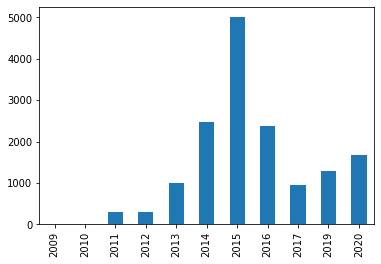

In [19]:
tweets['year'].value_counts().sort_index().plot(kind='bar')

In [20]:
russia = tweets['text'].str.contains('russia|Russia|moscow|Moscow|putin|Putin')
tweets[russia]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity,year
16,Twitter for iPhone,Another misinformation campaign is being launc...,2020-02-21 15:36:48,5629.0,19864.0,False,1.230879e+18,-0.625000,0.500000,2020
89,Twitter for iPhone,RT @TomFitton: Meanwhile Obama gang interfered...,2020-02-19 14:34:09,8730.0,0.0,True,1.230139e+18,0.000000,0.100000,2020
95,Twitter for iPhone,RT @RepLeeZeldin: “When law ends tyranny begin...,2020-02-19 14:26:06,9426.0,0.0,True,1.230136e+18,0.000000,0.000000,2020
446,Twitter for iPhone,RT @jsolomonReports: Breaking: Mueller’s team ...,2020-02-07 17:41:38,27648.0,0.0,True,1.225837e+18,0.000000,1.000000,2020
484,Twitter for iPhone,RT @dbongino: Short List of Debunked Democrat ...,2020-02-07 11:39:40,16375.0,0.0,True,1.225746e+18,0.000000,0.150000,2020
...,...,...,...,...,...,...,...,...,...,...
15006,Twitter Web Client,"We must never bend too much."" -- Yitzhak Shami...",2012-06-12 19:12:37,216.0,14.0,False,2.126235e+17,0.155546,0.460058,2012
15054,Twitter Web Client,It's not that I'm so smart it's just that I st...,2012-03-28 16:03:52,6.0,1.0,False,1.850345e+17,0.186741,0.532131,2012
15055,TwitLonger Beta,America's relationship with China is at a cros...,2012-03-01 20:02:16,180.0,14.0,False,1.753100e+17,0.195831,0.489859,2012
15059,TwitLonger Beta,Imagine how much stronger economic shape we wo...,2011-12-08 20:46:47,368.0,189.0,False,1.448806e+17,0.115664,0.483649,2011


In [23]:
tweets[russia]['year'].value_counts().sort_index()

2011     2
2012    10
2013    48
2014    40
2015    18
2016    21
2017    33
2019    22
2020    14
Name: year, dtype: int64